This script is my attempt for time series analysis. 

Pandas has dedicated libraries for handling TS objects, particularly the datatime64[ns] class which stores time information and allows us to perform some operations really fast.

In [40]:
import pandas as pd
import numpy as np
#import matplotlib.pylab as plt
#%matplotlib inline
import seaborn as sns
#from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv('data.csv')
print (data.head(2))
print ('\n Data Types:')
print (data.dtypes)

  action_type combined_shot_type  game_event_id   game_id      lat  loc_x  \
0   Jump Shot          Jump Shot             10  20000012  33.9723    167   
1   Jump Shot          Jump Shot             12  20000012  34.0443   -157   

   loc_y       lon  minutes_remaining  period   ...          shot_type  \
0     72 -118.1028                 10       1   ...     2PT Field Goal   
1      0 -118.4268                 10       1   ...     2PT Field Goal   

  shot_zone_area  shot_zone_basic  shot_zone_range     team_id  \
0  Right Side(R)        Mid-Range        16-24 ft.  1610612747   
1   Left Side(L)        Mid-Range         8-16 ft.  1610612747   

            team_name   game_date    matchup opponent  shot_id  
0  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        1  
1  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        2  

[2 rows x 25 columns]

 Data Types:
action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 

In [3]:
data['shot_made_flag'].unique()

array([ nan,   0.,   1.])

In [4]:
#Dropped all the nan values
data_Season = data[['season','shot_made_flag']].dropna()

In [5]:
print(data_Season.head(2))
print ('\n Data Types:')
print (data_Season.dtypes)

    season  shot_made_flag
1  2000-01             0.0
2  2000-01             1.0

 Data Types:
season             object
shot_made_flag    float64
dtype: object


The data contains a particular season and number of shots in that season. But this is still not read as a TS object as the data types are ‘object’ and ‘float’. In order to read the data as a time series, we have to pass special arguments to the read_csv command:

In [6]:
#specifies a function which converts an input string into datetime variable.
dateparse = lambda dates: pd.datetime.strptime(dates,'%Y-%y')
#parse_dates: This specifies the column which contains the date-time information.
#index_col: tells pandas to use the 'season' column as  index

data = pd.read_csv('dataSeason.csv', parse_dates='season',index_col = 'season',date_parser=dateparse)
print (data.head())
print (data.dtypes)


            Unnamed: 0  shot_made_flag
season                                
2000-01-01           1             0.0
2000-01-01           2             1.0
2000-01-01           3             0.0
2000-01-01           4             1.0
2000-01-01           5             0.0
Unnamed: 0          int64
shot_made_flag    float64
dtype: object


In [7]:
data.columns


Index(['Unnamed: 0', 'shot_made_flag'], dtype='object')

In [8]:
data.drop('Unnamed: 0',axis = 1,inplace = True)

In [9]:
data.head(2)


,shot_made_flag
season,
2000-01-01,0.0
2000-01-01,1.0


In [10]:
data.index

DatetimeIndex(['2000-01-01', '2000-01-01', '2000-01-01', '2000-01-01',
               '2000-01-01', '2000-01-01', '2000-01-01', '2000-01-01',
               '2000-01-01', '2000-01-01',
               ...
               '1999-01-01', '1999-01-01', '1999-01-01', '1999-01-01',
               '1999-01-01', '1999-01-01', '1999-01-01', '1999-01-01',
               '1999-01-01', '1999-01-01'],
              dtype='datetime64[ns]', name='season', length=25697, freq=None)

In [11]:
ts = data['shot_made_flag']

In [12]:
ts.head(5)

season
2000-01-01    0.0
2000-01-01    1.0
2000-01-01    0.0
2000-01-01    1.0
2000-01-01    0.0
Name: shot_made_flag, dtype: float64

## Check Stationarity of a Time Series

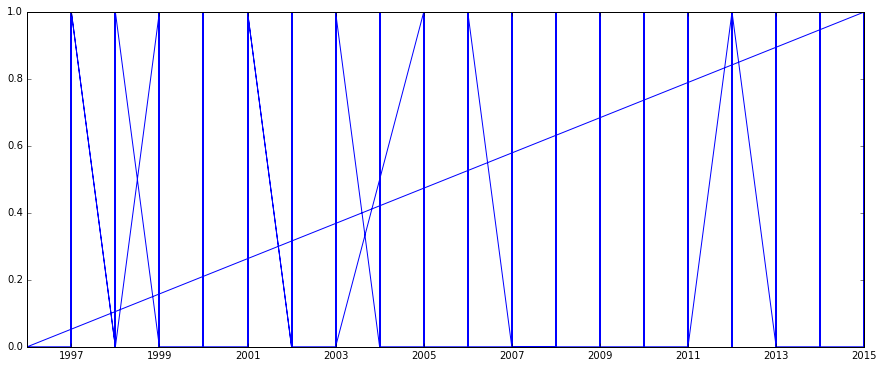

In [13]:
plt.plot(ts)

clearly evident that there is no an overall increasing trend in the data along with some seasonal variations.

In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


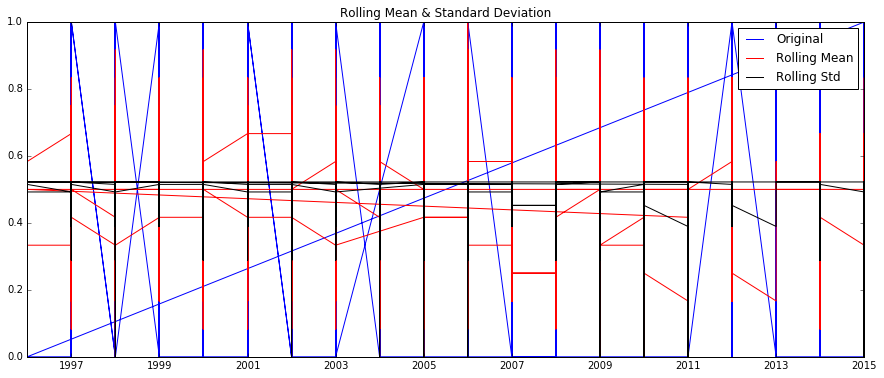

Results of Dickey-Fuller Test:
Test Statistic                  -162.158185
p-value                            0.000000
#Lags Used                         0.000000
Number of Observations Used    25696.000000
Critical Value (5%)               -2.861652
Critical Value (1%)               -3.430605
Critical Value (10%)              -2.566830
dtype: float64


In [15]:
test_stationarity(ts)

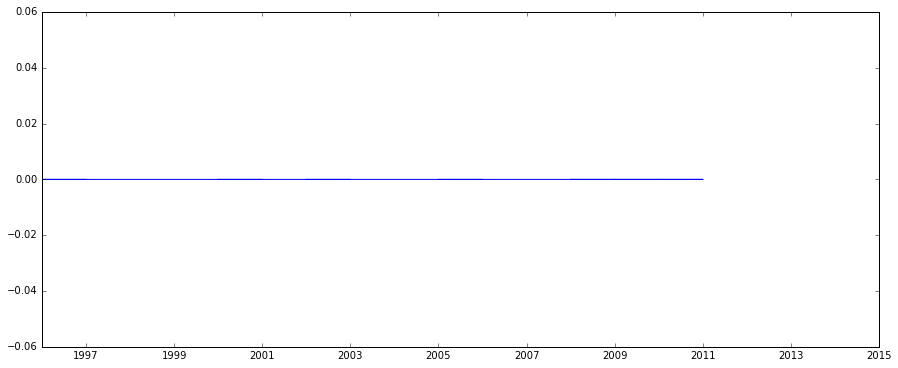

In [131]:
ts_log = np.log(ts)
plt.plot(ts_log)

I have done some mistake. I will like any comments. However I am taking another approach for the analysis. 

## Data Visualisation

In [21]:
data_Season.head(2)

,season,shot_made_flag
1,2000-01,0.0
2,2000-01,1.0


In [25]:
import matplotlib.mlab as mlab
print (len(data_Season))

25697


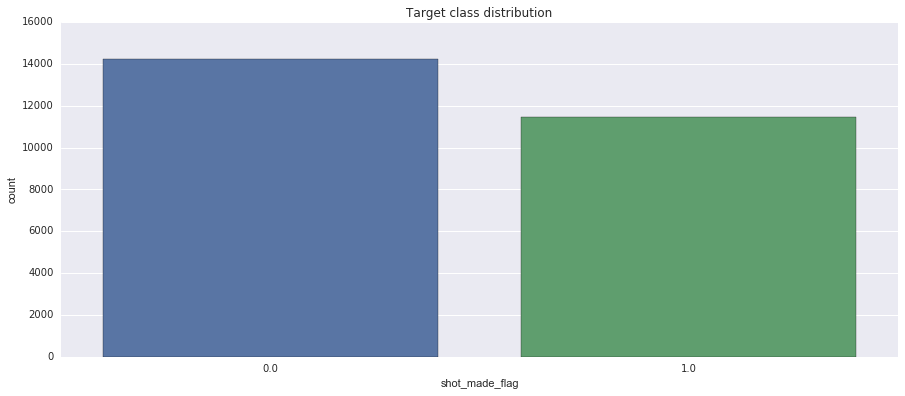

In [39]:
#See target class distribution
ax = plt.axes()
sns.countplot(x='shot_made_flag', data=data_Season, ax=ax);
ax.set_title('Target class distribution')
plt.show()

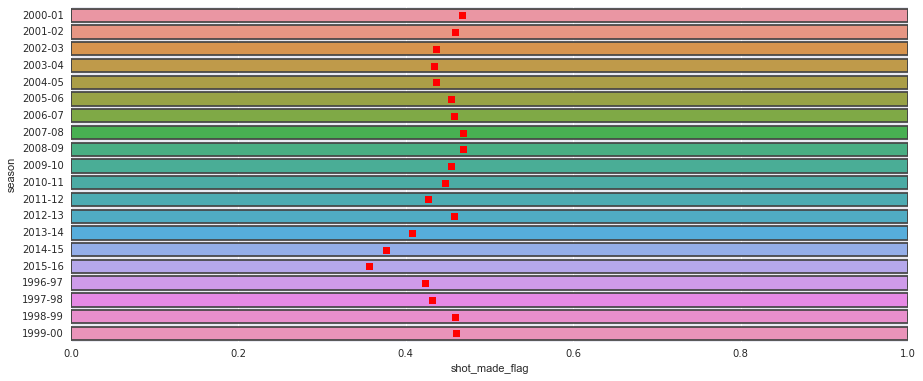

In [49]:

pred = sns.boxplot(x='shot_made_flag', y='season', data=data_Season, showmeans=True)